<center><u><h1>Assignment 3: Converting Words into vectors (Advance techniques)</center></u></h1>

![image3.1.png](https://monkeylearn.com/static/e7dd6511434a685cc7d20a7147e108d3/Text-to-vector-3_normal.png)

---

**Topics Covered in this Assignment:**
1.   Words Embedding
2.   Gensim
3.   Word2Vec

----





<b>Welcome to the Assignment 3 of the series of NLP!!</b><br>This chapter will dive deep into converting words into vectors. So before beginning this section, do revise the previous assignment as this is the continuation of the same.

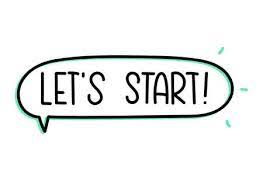

1.Words Embedding

Word Embedding is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc.

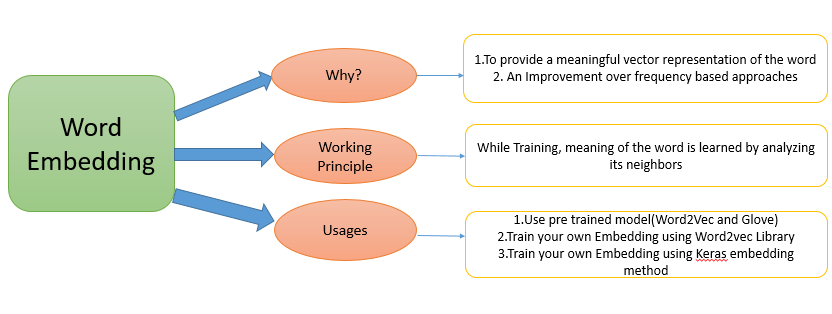


Reference: https://en.wikipedia.org/wiki/Word_embedding

# Gensim
"Generate Similar" is a popular open source natural language processing library used for unsupervised topic modeling. It is designed to extract semantic topics from documents. It can handle large text collections. Hence it makes it different from other machine learning software packages which target memory processing. Gensim also provides efficient multicore implementations for various algorithms to increase processing speed. It provides more convenient  facilities for text processing than other packages

Corpus: A collection of text documents.<br>
Vector: Form of representing text.<br>
Model: Algorithm used to generate representation of data.<br>
Topic Modelling: It is an information mining tool which is used to extract semantic topics from documents.<br>
Topic: A repeating group of words frequently occurring together.<br>


![link text](https://radimrehurek.com/gensim/_static/images/Gensim-OG-Image.jpg)
<br>

Refernece:https://en.wikipedia.org/wiki/Gensim

# Word2Vec
Word2Vec consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer.
<br>
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
It has 2 types 
1. CBOW (Continuous Bag of Words)
2. Skip Gram


#CBOW (Continuous Bag of Words)
CBOW model predicts the current word given context words within specific window. The input layer contains the context words and the output layer contains the current word. The hidden layer contains the number of dimensions in which we want to represent current word present at the output layer.

![link text](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-26_at_2.04.47_PM.png)

<br>
<br>

Reference: https://en.wikipedia.org/wiki/Word2vec

# Skip Gram
Skip gram predicts the surrounding context words within specific window given current word. The input layer contains the current word and the output layer contains the context words. The hidden layer contains the number of dimensions in which we want to represent current word present at the input layer.

![link text](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-26_at_2.04.55_PM.png)
<br>
<br>

Reference: https://en.wikipedia.org/wiki/Word2vec

Diiference between CBOW and SKIP-GRAM

![link text](https://inspiringpeople.github.io/assets/img/cbow_skipgram.PNG)


Let's start implementing vectorization of words using Word2Vec from gensim models. For that we first import nltk and then download punkt and stopwords from nltk.


In [5]:
#importing nltk and download punkt and stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[nltk_data] Downloading package punkt to /Users/solo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/solo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


Now we import the Word2Vec library from gensim.models and stopwords from nltk.corpus. Re is also imported which will be used for preprocesisng the data.



In [6]:
!pip3 install gensim

In [7]:
#import word2vec from gensim.models,import stopwords from nltk.corpus,import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re


Below is the sample data that we will be using for vectorization. The words from this data will be converted into vectors. You may also use your own data or any random data as long as you follow the correct procedure.


In [8]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""


Next step is to preprocess the above given sample data. The data is needed to be preprocessed to remove any extra whitespaces, unnecessary digits so that the data can be properly vectorized and extra things don't occupy necessary space. Also, preprocessing involves tokenization of the data as vectorization requires sentences to be converted into words. Stopwords removal also takes place to discard stopwords that are not necessary in sentences and give more importance to significant words in the data.



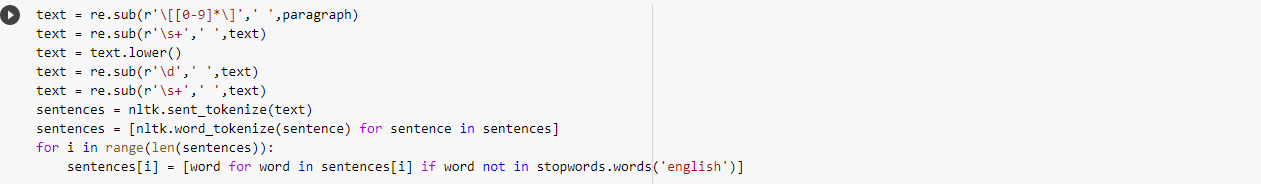


We will be using regular expressions for preprocessing the data. Digits in the data are replaced with whitespaces and existing one or more whitespaces are replaced with a single whitespace. <br>Know more about Regular Expressions: https://docs.python.org/3/library/re.html. <br><br>The data is converted into lowercase for ease in vectorization because in the computer's perspective, lowercase and uppercase characters are different(i.e. A and a are completely different). The paragraph is tokenized into sentences and also sentences are tokenized into words. English stopwords are removed from the processed data.<br><br>


See the above image and write the code in below cell.




In [9]:
# Preprocessing the data
# we are preprocessing the data here we are replacing the data with space
text = re.sub(r'\[[0-9]*\]', ' ', paragraph)
text = re.sub(r'\s+', ' ', text)
text = text.lower()
text = re.sub(r'\d', ' ', text)
text = re.sub(r'\s+',' ', text)
sentences = nltk.sent_tokenize(text)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

Let's check the preprocessed data which is stored in the sentences variable. We print the second processed sentence by indexing it with '1'. You can print any other sentence by changing the index.

In [10]:
sentences[1]

['years',
 'history',
 ',',
 'people',
 'world',
 'come',
 'invaded',
 'us',
 ',',
 'captured',
 'lands',
 ',',
 'conquered',
 'minds',
 '.']

In [11]:
#print any sentence index as above


We can see that the data is now processed and all the extra things are removed including stop words.
After the data is preprocessed, we will vectorize the data using Word2Vec.
We are vectorizing the data on word2vec with min_count=1. min_count parameter ignores all words with total frequency lower than the given value.


In [12]:
# Training the Word2Vec model
w2v_model = Word2Vec(min_count=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30)

(2836, 6420)

Here we have trained data on Word2Vec with min_count=1


Now we can make model vocabulary using the wv object. This object essentially contains the mapping between words and embeddings. After training, it can be used directly to query those embeddings in various ways. The vocab function creates the vocabulary of the model and this vocabulary is stored in the words variable.


In [13]:
#Creating words using vocab
words = w2v_model.wv.key_to_index

In [14]:
words

{'.': 0,
 ',': 1,
 'india': 2,
 'vision': 3,
 'must': 4,
 'nation': 5,
 'world': 6,
 'us': 7,
 'three': 8,
 'freedom': 9,
 'respect': 10,
 'see': 11,
 'first': 12,
 'power': 13,
 'yet': 14,
 '’': 15,
 'strength': 16,
 'worked': 17,
 '?': 18,
 'life': 19,
 'believe': 20,
 'dr.': 21,
 'great': 22,
 'minds': 23,
 'one': 24,
 'years': 25,
 'history': 26,
 'developed': 27,
 'conquered': 28,
 'protect': 29,
 'others.that': 30,
 'war': 31,
 'nurture': 32,
 'independence': 33,
 'build': 34,
 'free': 35,
 'tried': 36,
 'got': 37,
 'started': 38,
 'way': 39,
 'enforce': 40,
 'took': 41,
 'culture': 42,
 'turks': 43,
 'visions': 44,
 'people': 45,
 'come': 46,
 'invaded': 47,
 'captured': 48,
 'lands': 49,
 'alexander': 50,
 'onwards': 51,
 'greeks': 52,
 'moguls': 53,
 'land': 54,
 'portuguese': 55,
 'british': 56,
 'french': 57,
 'dutch': 58,
 'came': 59,
 'looted': 60,
 'done': 61,
 'anyone': 62,
 'grabbed': 63,
 'second': 64,
 'career': 65,
 'development': 66,
 'respects': 67,
 'military': 68


Now we find a word vector for verifying that our model is performing well. We simply pass a word into the model through the wv object( which contains mappings between words and its embeddings). We also check the dimensions of the produced vector using the shape function.

In [15]:
# Finding Word Vectors
vector = w2v_model.wv['war']
#print vector
print(vector)
#printing dimensions of vector using .shape.
print(vector.shape)

[-0.00226459 -0.00887417  0.00942641  0.00201601 -0.00053851 -0.00667918
 -0.00755766 -0.00862869  0.00830826 -0.00324357  0.0039872  -0.0059867
  0.00980505  0.00421162  0.00135979 -0.00428952  0.0010948  -0.00282264
  0.00709694  0.00300933  0.00152921  0.0034204   0.0042255  -0.00717885
  0.00872274  0.00200389 -0.00640825  0.00859153 -0.00179697  0.0079006
 -0.0006353   0.00693987  0.00317574 -0.00521936 -0.00387939  0.00983641
  0.00202348 -0.00625393  0.0004693  -0.0025597   0.00201271 -0.00816579
  0.00687872  0.00119895  0.00816493  0.0046627  -0.00486178  0.00355279
 -0.00023787 -0.00927509  0.00903534  0.00892743  0.01022787 -0.0040015
 -0.00838956  0.00571591 -0.0076081   0.00893232  0.00161892  0.00583708
  0.00601945  0.00026042 -0.00184171  0.00091262  0.00940247 -0.00644698
 -0.00130469 -0.00161148  0.00422364  0.00744889 -0.00463992  0.00418463
 -0.00375439  0.00344821  0.00900163  0.00379069 -0.00461524 -0.00284997
  0.008076    0.00951633  0.00505473 -0.00296227 -0.00

We see that the vector of the 'war' word is displayed. You can try it for any other word from the data. We can observe that for all the words the shape of the vector is 100. This is because while creating the Word2Vec object we had set the vector_size parameter to default. The default value of vector_size is 100. It can be changed according to different use cases. Understand about it more here: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html<br><br>
Now, we try to find the most similar words for the given word. The most_similar function is used to find the similar words.



In [16]:
#trying to find the Most similar words 
similar = w2v_model.wv.most_similar('vikram')


We have stored the most similar words in Similar variable. After storing the variable we will print the values.



In [17]:
#printing similar values using for loop
for i in similar:
    print(i)

('visions', 0.18016155064105988)
('one', 0.17244723439216614)
('took', 0.17142030596733093)
('growth', 0.1711728721857071)
(',', 0.15871348977088928)
('worked', 0.15619805455207825)
('development', 0.15175248682498932)
('developing', 0.14919154345989227)
('fifty', 0.14747247099876404)
('nurture', 0.13911420106887817)



We found that most similar word for vikram based on the data which have trained on it.

---
In this assignment, we were able to code for Word2Vec using gensim library i.e an advance version of word embedding. -_-
---